# Cleaning

In [91]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point, Polygon
pd.set_option('display.max_columns', None)

In [8]:
df = pd.read_csv('../Team2/SpotifyFeatures.csv')
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [9]:
df['genre'].value_counts()

genre
Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: count, dtype: int64

In [10]:
df.shape

(232725, 18)

In [11]:
df.isna().sum()

genre               0
artist_name         0
track_name          1
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [12]:
df[df['track_name'].isna()]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
208285,World,Elevation Worship,NaN,7BGQCe62A58Q5ZgpQFX93t,44,0.019,0.287,350027,0.446,0.0,F,0.1,-7.214,Major,0.0317,138.727,4/4,0.0387


In [13]:
df = df.fillna("None")

In [14]:
df.isna().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [15]:
df = df.drop(columns=['track_id'])
df.dtypes

genre                object
artist_name          object
track_name           object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

In [16]:
df['mode'] = df['mode'].map({'Major': 1, 'Minor': 0})
df['mode'].value_counts()

mode
1    151744
0     80981
Name: count, dtype: int64

In [17]:
dum_genre = pd.get_dummies(df['genre'], drop_first=True)
dum_genre.head()

,Alternative,Anime,Blues,Children's Music,Children’s Music,Classical,Comedy,Country,Dance,Electronic,Folk,Hip-Hop,Indie,Jazz,Movie,Opera,Pop,R&B,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [18]:
df = pd.concat((df, dum_genre), axis=1)
df.head()

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Alternative,Anime,Blues,Children's Music,Children’s Music,Classical,Comedy,Country,Dance,Electronic,Folk,Hip-Hop,Indie,Jazz,Movie,Opera,Pop,R&B,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,1,0.0525,166.969,4/4,0.814,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,0,0.0868,174.003,4/4,0.816,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,0,0.0362,99.488,5/4,0.368,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,1,0.0395,171.758,4/4,0.227,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,Movie,Fabien Nataf,Ouverture,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,1,0.0456,140.576,4/4,0.390,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [19]:
#Turning time_signature column to a float

def frc_to_float(col):
    new_vals = [i.split("/") for i in col]
    float_list = []
    for pair in new_vals:
        num = int(pair[0])/int(pair[1])
        float_list.append(num)
    return float_list

df['time_signature'] = frc_to_float(df['time_signature'])
df.dtypes

genre                object
artist_name          object
track_name           object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
Alternative            bool
Anime                  bool
Blues                  bool
Children's Music       bool
Children’s Music       bool
Classical              bool
Comedy                 bool
Country                bool
Dance                  bool
Electronic             bool
Folk                   bool
Hip-Hop                bool
Indie                  bool
Jazz                   bool
Movie                  bool
Opera                  bool
Pop                    bool
R&B                    bool
Rap                 

In [20]:
df['time_signature'].value_counts()

time_signature
1.00    200760
0.75     24111
1.25      5238
0.25      2608
0.00         8
Name: count, dtype: int64

In [21]:
#checking how many unique values are in key column
df['key'].value_counts()

key
C     27583
G     26390
D     24077
C#    23201
A     22671
F     20279
B     17661
E     17390
A#    15526
F#    15222
G#    15159
D#     7566
Name: count, dtype: int64

In [22]:
#Dummifying Key Column

dum_key = pd.get_dummies(df['key'], drop_first=True)
dum_key.head()

,A#,B,C,C#,D,D#,E,F,F#,G,G#
0,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False
2,False,False,True,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False,False,False


In [23]:
df = pd.concat((df, dum_key), axis=1)
df.head()

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Alternative,Anime,Blues,Children's Music,Children’s Music,Classical,Comedy,Country,Dance,Electronic,Folk,Hip-Hop,Indie,Jazz,Movie,Opera,Pop,R&B,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World,A#,B,C,C#,D,D#,E,F,F#,G,G#
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,1,0.0525,166.969,1.00,0.814,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,0,0.0868,174.003,1.00,0.816,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,0,0.0362,99.488,1.25,0.368,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,1,0.0395,171.758,1.00,0.227,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,Movie,Fabien Nataf,Ouverture,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,1,0.0456,140.576,1.00,0.390,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [24]:
df_numeric = df.drop(columns=['genre', 'key', 'artist_name', 'track_name'])

In [25]:
df_numeric.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Alternative,Anime,Blues,Children's Music,Children’s Music,Classical,Comedy,Country,Dance,Electronic,Folk,Hip-Hop,Indie,Jazz,Movie,Opera,Pop,R&B,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World,A#,B,C,C#,D,D#,E,F,F#,G,G#
0,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,1,0.0525,166.969,1.00,0.814,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,0,0.0868,174.003,1.00,0.816,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,0,0.0362,99.488,1.25,0.368,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
3,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,1,0.0395,171.758,1.00,0.227,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,1,0.0456,140.576,1.00,0.390,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


<Axes: >

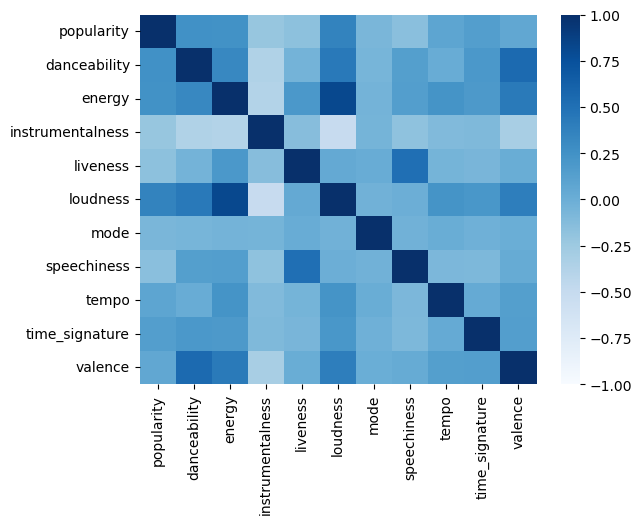

In [26]:
# var_corrs1 = df_numeric.drop(columns=['
sns.heatmap(df_numeric[['popularity', 'danceability', 'energy', 'instrumentalness', 
                        'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 
                        'valence']].corr(), vmin=-1, vmax=1, cmap='Blues'
           )

In [27]:
pop1 = df_numeric.corr()[['popularity']].sort_values(by='popularity', ascending = False)
pop1

,popularity
popularity,1.000000
loudness,0.363011
Pop,0.286972
danceability,0.256564
energy,0.248922
Rap,0.216834
Rock,0.207083
Hip-Hop,0.193937
Dance,0.174952
Indie,0.154309


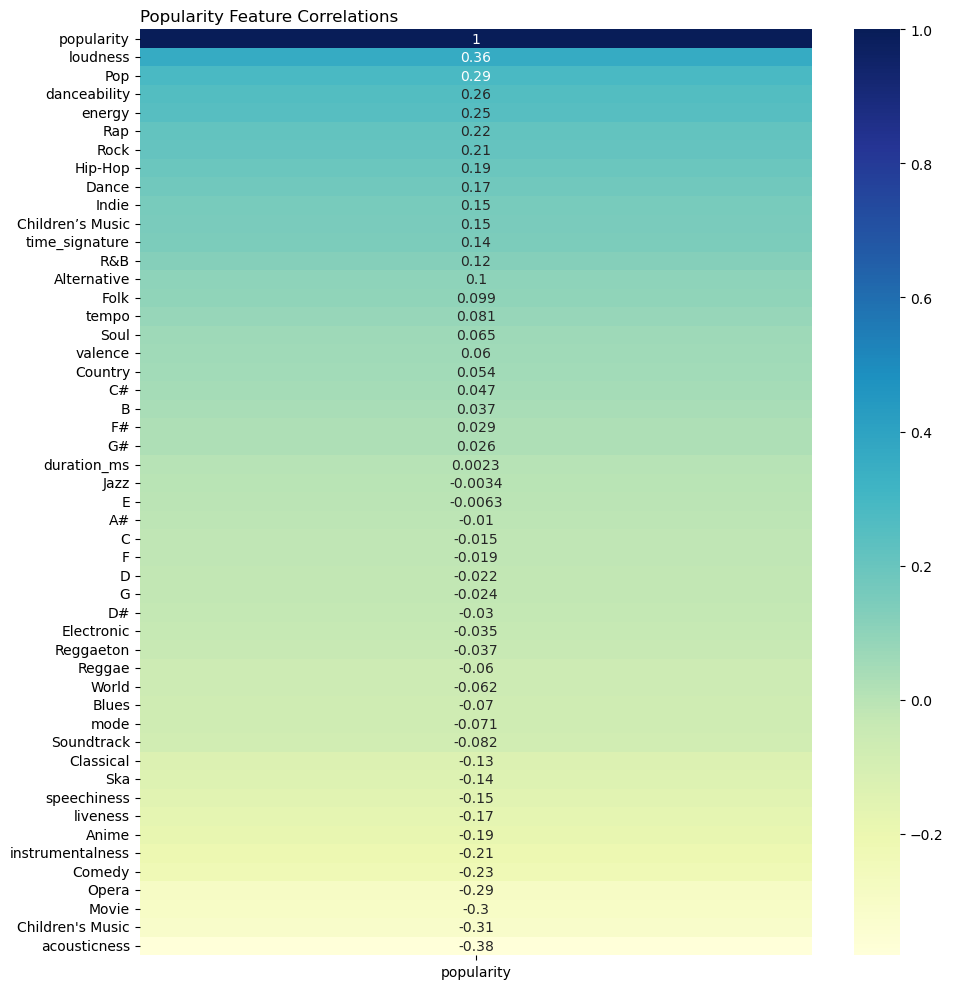

In [28]:
plt.figure(figsize = (10,10))
sns.heatmap(pop1, annot=True, cmap='YlGnBu');
plt.title('Popularity Feature Correlations', loc='left');
plt.tight_layout()
plt.savefig('Spotify_Popul_Corrs.png')

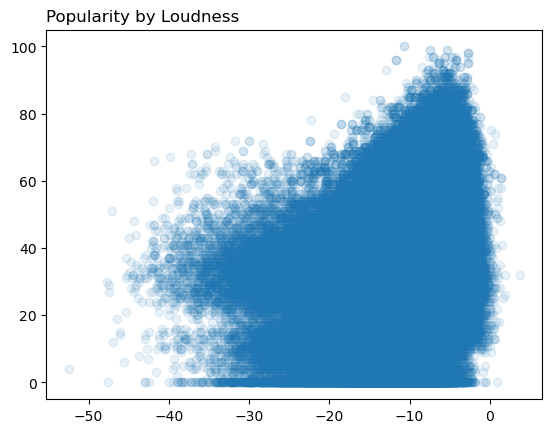

In [39]:
plt.scatter(df_numeric['loudness'], df_numeric['popularity'], alpha=.1)
plt.title('Popularity by Loudness', loc='left');

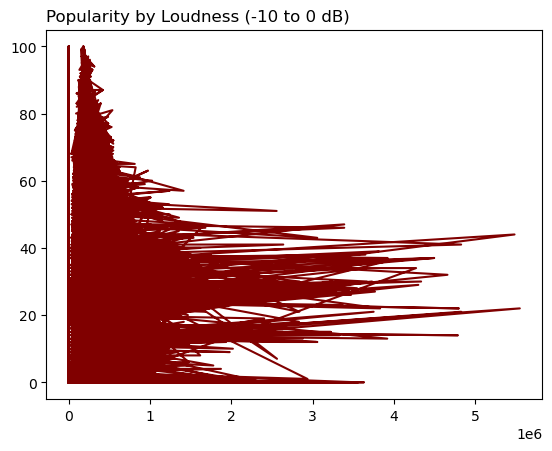

In [50]:
pop_dec = df_numeric[df_numeric['popularity'] >= -10]
plt.plot(pop_dec, df_numeric['popularity'], color="maroon")
plt.title('Popularity by Loudness (-10 to 0 dB)', loc='left');
plt.xlabel('Decimal')
plt.ylabel('Popularity')

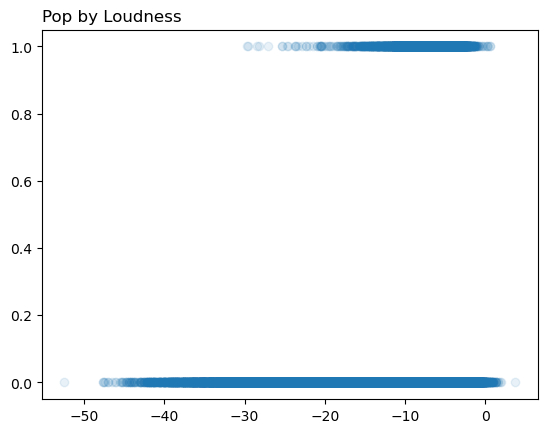

In [38]:
plt.scatter(df_numeric['loudness'], df_numeric['pop'], alpha=.1)
plt.title('Pop by Loudness', loc='left');

Above we see that most pop songs fall within the -10 to 0 dB range.

In [55]:
df_numeric.corr()[['Pop']].sort_values(by='Pop', ascending = False)

,Pop
Pop,1.000000
popularity,0.286972
loudness,0.105077
danceability,0.094844
energy,0.055442
time_signature,0.031609
tempo,0.023283
valence,0.020853
C#,0.019632
G#,0.012004


In [58]:
kp = df_numeric[['C#', 'G#', 'F#', 'B', 'A#', 'F', 'Pop']]
kp.shape

(232725, 7)

In [71]:
pop_group = df_numeric.groupby(['Pop']).sum()
pop_group.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,mode,speechiness,tempo,time_signature,valence,Alternative,Anime,Blues,Children's Music,Children’s Music,Classical,Comedy,Country,Dance,Electronic,Folk,Hip-Hop,Indie,Jazz,Movie,Opera,R&B,Rap,Reggae,Reggaeton,Rock,Ska,Soul,Soundtrack,World,A#,B,C,C#,D,D#,E,F,F#,G,G#
Pop,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,8946378,83663.079705,123005.2181,52645862337,126848.358229,34357.605070,48348.86844,-2166185.544,145901,27091.700,2.624660e+07,216758.75,101352.3786,9263,8936,9023,5403,9353,9256,9681,8664,8701,9377,9299,9295,9543,9441,7806,8280,8992,9232,8771,8927,9272,8874,9089,9646,9096,14868,16859,26516,21996,23227,7274,16780,19448,14523,25503,14412
True,625020,2110.151430,6009.2530,2072984078,6027.766330,155.799529,1689.16730,-60966.036,5843,1013.338,1.137356e+06,9284.00,4518.1467,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,658,802,1067,1205,850,292,610,831,699,887,747


In [72]:
pop_keys = pop_group.loc[True, ['C#', 'G#', 'F#', 'B', 'A#', 'F',]]
pop_keys.head()

C#    1205.0
G#     747.0
F#     699.0
B      802.0
A#     658.0
Name: True, dtype: float64

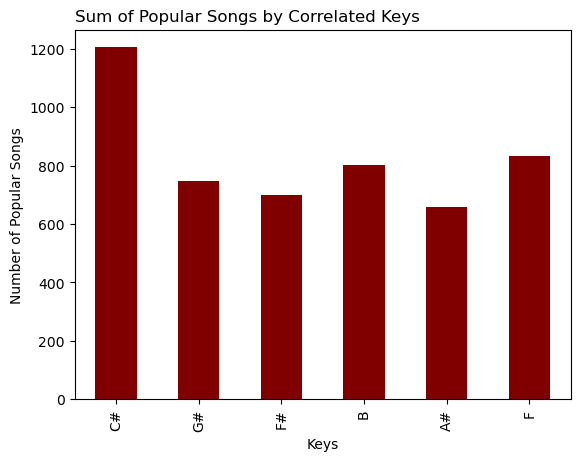

In [85]:
pop_keys.plot(kind='bar', color= "maroon")
plt.title('Sum of Popular Songs by Correlated Keys', loc='left')
plt.xlabel('Keys')
plt.ylabel('Number of Popular Songs');

Text(0.0, 1.0, 'Popularity by Feature Correlation')

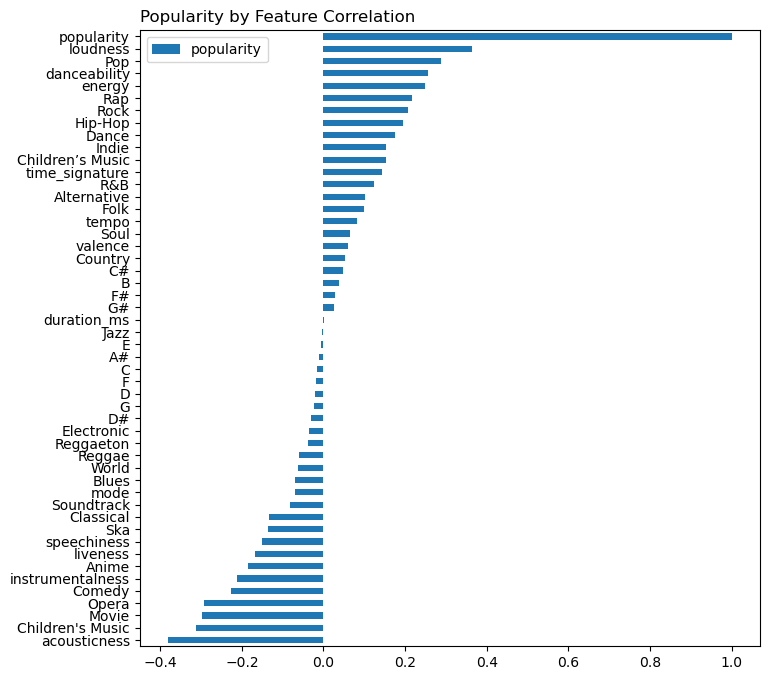

In [107]:
fig, ax = plt.subplots(figsize=(8,8))
pop1_reversed = pop1.iloc[::-1]
pop1_reversed.plot(kind='barh', ax=ax)
plt.title('Popularity by Feature Correlation', loc='left')